In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [54]:
df=pd.read_csv("7.csv")
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [55]:
mapping=dict(zip(df.species.unique(),(range(1,df.species.unique().size+1,1))))
df["species"]=df["species"].replace(mapping)
df

C:\Users\HARSH_blbol4q\AppData\Local\Temp\ipykernel_13268\3202998356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"]=df["species"].replace(mapping)


,species,length,weight,w_l_ratio
0,1,10.66,3.45,0.32
1,1,6.91,3.27,0.47
2,1,8.38,3.46,0.41
3,1,7.57,3.36,0.44
4,1,10.83,3.38,0.31
...,...,...,...,...
4075,9,30.56,6.12,0.20
4076,9,29.66,6.11,0.21
4077,9,32.81,6.25,0.19
4078,9,29.78,6.11,0.21


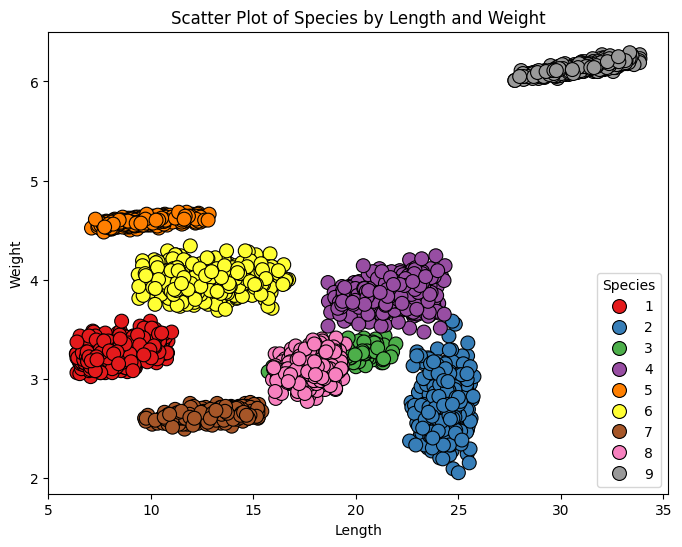

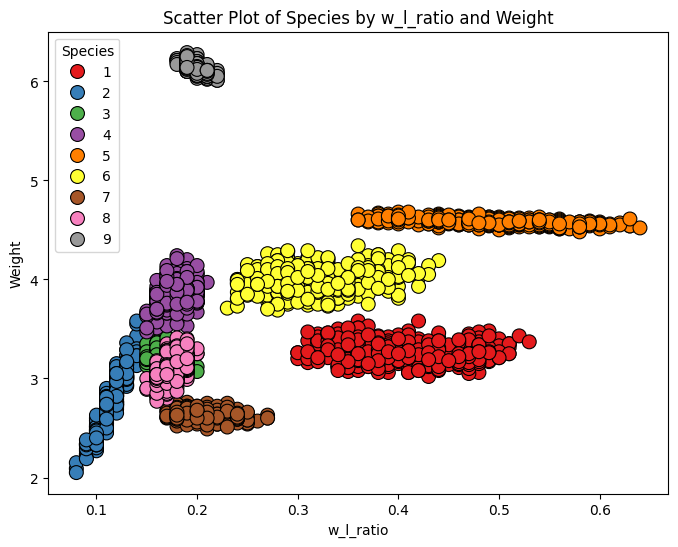

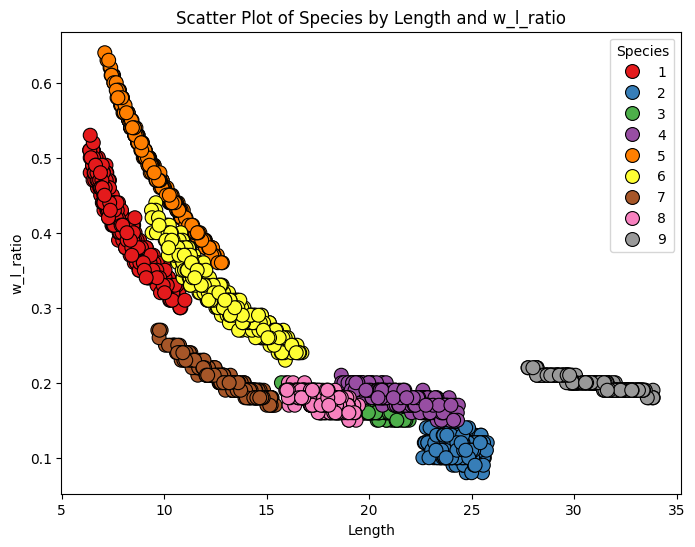

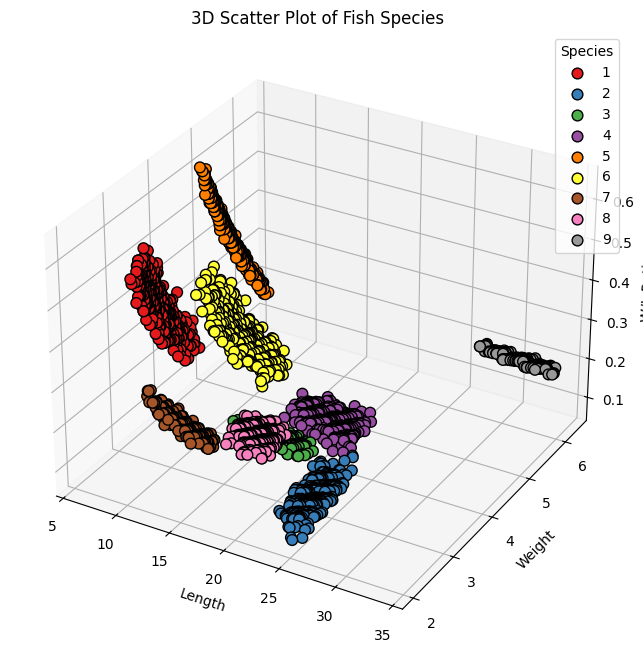

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="length", y="weight", hue="species", data=df, palette="Set1", s=100, edgecolor="black")

plt.xlabel("Length")
plt.ylabel("Weight")
plt.title("Scatter Plot of Species by Length and Weight")
plt.legend(title="Species")
plt.savefig("length_weight.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="w_l_ratio", y="weight", hue="species", data=df, palette="Set1", s=100, edgecolor="black")

plt.xlabel("w_l_ratio")
plt.ylabel("Weight")
plt.title("Scatter Plot of Species by w_l_ratio and Weight")
plt.legend(title="Species")
plt.savefig("w_l_ratio__weight", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="length", y="w_l_ratio", hue="species", data=df, palette="Set1", s=100, edgecolor="black")

plt.xlabel("Length")
plt.ylabel("w_l_ratio")
plt.title("Scatter Plot of Species by Length and w_l_ratio")
plt.legend(title="Species")
plt.savefig("length__w_l_ratio.png", dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
species_list = df["species"].unique()
colors = sns.color_palette("Set1", len(species_list))  # Generate colors for species
for species, color in zip(species_list, colors):
    species_data = df[df["species"] == species]
    ax.scatter(species_data["length"], species_data["weight"], species_data["w_l_ratio"], 
               label=f"{species}", color=color, s=60, edgecolors="black",alpha=1)
ax.set_xlabel("Length")
ax.set_ylabel("Weight")
ax.set_zlabel("W/L Ratio")
ax.set_title("3D Scatter Plot of Fish Species")
ax.legend(title="Species")
plt.savefig("3d_plot.png", dpi=300, bbox_inches='tight')
plt.show()

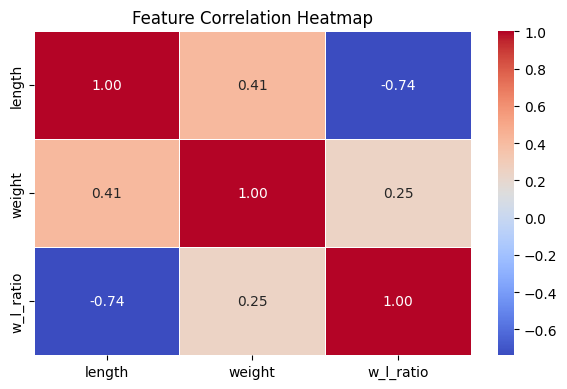

In [57]:
features = ["length", "weight", "w_l_ratio"]
corr = df[features].corr()

# Plot heatmap with values
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,            # shows the correlation values
    fmt=".2f",             # format to 2 decimal places
    cmap="coolwarm",       # red-blue color map
    linewidths=0.5,        # grid lines
    cbar=True              # show color bar
)

plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [58]:
train,test_val=train_test_split(df,test_size=0.4,stratify=df["species"],random_state=42)
val,test=train_test_split(test_val,test_size=0.5,stratify=test_val["species"],random_state=42)


train.to_csv("train.csv")
test.to_csv("test.csv")
val.to_csv("val.csv")